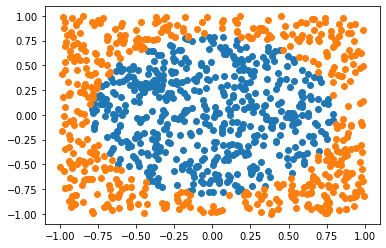

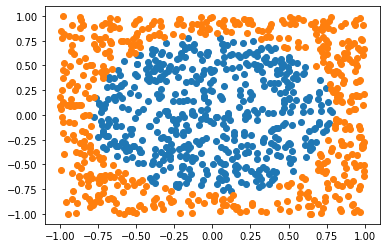

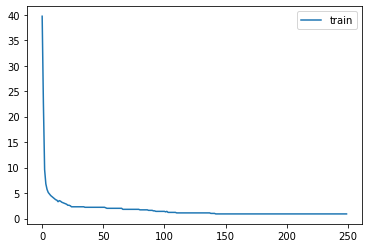

In [12]:
from utilities import *
import torch
from torch import nn
from torch import optim
import math
from matplotlib import pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

def train_model(model, train_input, train_target):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr = 1e-1)
    nb_epochs = 250
    mini_batch_size = 100
    test_accuracy = torch.empty(nb_epochs).zero_()
    train_accuracy = torch.empty(nb_epochs).zero_()

    for e in range(nb_epochs):
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            model.zero_grad()
            loss.backward()
            optimizer.step()
            train_accuracy[e] += compute_nb_errors(output, train_target.narrow(0, b, mini_batch_size))
    return test_accuracy,train_accuracy

def compute_nb_errors(data_input, data_target):

    nb_data_errors = 0
    _,predicted_class = torch.max(data_input,1)
    for i in range(data_target.size(0)):
        if data_target[i] != predicted_class[i]:
            nb_data_errors += 1

    return nb_data_errors

def create_deep_model():
    return nn.Sequential(
        nn.Linear(2, 128),
        nn.ReLU(),
        nn.Linear(128, 2)
    )

utile = utilities(1000,1000)
# train_input, train_target, test_input, test_targets = utile.create_datasets(plot=False)

# mean, std = train_input.mean(), train_input.std()

# train_input.sub_(mean).div_(std)
# test_input.sub_(mean).div_(std)

def generate_disc_set(nb):
    input = torch.empty(nb, 2).uniform_(-1, 1)
    target = input.pow(2).sum(1).sub(2 / math.pi).sign().add(1).div(2).long()
    
    plt.scatter(input[target == 0,0],input[target == 0,1])
    plt.scatter(input[target == 1,0],input[target == 1,1])
    plt.show()
    
    return input, target

train_input, train_target = generate_disc_set(1000)
test_input, test_target = generate_disc_set(1000)

mean, std = train_input.mean(), train_input.std()

train_input.sub_(mean).div_(std)
test_input.sub_(mean).div_(std)

mini_batch_size = 100

model = create_deep_model()
std = 1.

if std > 0:
    with torch.no_grad():
        for p in model.parameters(): p.normal_(0, std)


_, train_error = train_model(model, train_input, train_target)

train_accuracy = train_error/1000 * 100

plt.plot(train_accuracy, label = "train")
plt.legend()
plt.show()
